In [1]:
# import sys 
# sys.path.append("../")
import pandas as pd

#import backtester as bt
import backtester as bt

from abc import ABC, abstractmethod
# import QuantLib as ql 
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
from xbbg import blp
import os
import mplfinance as mpf
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import numpy as np
import matplotlib.ticker as mticker

In [2]:
market_handle = bt.MarketDataHandler()

# Load a ticker

In [3]:
market_handle.load_price('SPY US Equity', '1d') # daily prices

,date,ticker,open,high,low,close,volume,insertion_time
0,2005-01-03,SPY US Equity,83.2045,83.3140,82.0413,82.3150,56002000.0,2025-06-11 11:02:00
1,2005-01-04,SPY US Equity,82.4244,82.4792,81.0423,81.3091,69270700.0,2025-06-11 11:02:00
2,2005-01-05,SPY US Equity,81.2475,81.5965,80.7412,80.7480,65878000.0,2025-06-11 11:02:00
3,2005-01-06,SPY US Equity,81.0423,81.5281,80.9191,81.1586,48291000.0,2025-06-11 11:02:00
4,2005-01-07,SPY US Equity,81.4049,81.5828,80.8301,81.0423,55857400.0,2025-06-11 11:02:00
...,...,...,...,...,...,...,...,...
5141,2025-06-10,SPY US Equity,600.2200,603.4700,599.0900,603.0800,66246973.0,2025-06-17 12:43:00
5142,2025-06-11,SPY US Equity,604.1900,605.0600,599.2700,601.3600,73658225.0,2025-06-17 12:43:00
5143,2025-06-12,SPY US Equity,600.0100,603.7500,599.5200,603.7500,64129003.0,2025-06-17 12:43:00
5144,2025-06-13,SPY US Equity,598.5000,601.8500,595.4800,597.0000,89505996.0,2025-06-17 12:43:00


In [4]:
market_handle.load_price('SPY US Equity', '1m').tail(20) # intraday prices

,date,time,ticker,open,high,low,close,volume,insertion_time
195986,2025-06-16,21:42:00,SPY US Equity,602.190,602.200,602.09,602.090,128312.0,2025-06-17 14:08:00
195987,2025-06-16,21:43:00,SPY US Equity,602.100,602.130,602.02,602.130,123524.0,2025-06-17 14:08:00
195988,2025-06-16,21:44:00,SPY US Equity,602.125,602.270,602.04,602.240,232582.0,2025-06-17 14:08:00
195989,2025-06-16,21:45:00,SPY US Equity,602.240,602.480,602.24,602.470,290194.0,2025-06-17 14:08:00
195990,2025-06-16,21:46:00,SPY US Equity,602.470,602.490,602.32,602.470,158527.0,2025-06-17 14:08:00
195991,2025-06-16,21:47:00,SPY US Equity,602.460,602.490,602.35,602.430,127396.0,2025-06-17 14:08:00
195992,2025-06-16,21:48:00,SPY US Equity,602.430,602.610,602.32,602.610,191402.0,2025-06-17 14:08:00
195993,2025-06-16,21:49:00,SPY US Equity,602.620,602.670,602.26,602.330,472719.0,2025-06-17 14:08:00
195994,2025-06-16,21:50:00,SPY US Equity,602.350,602.350,601.99,602.040,247440.0,2025-06-17 14:08:00
195995,2025-06-16,21:51:00,SPY US Equity,602.040,602.219,602.01,602.160,187238.0,2025-06-17 14:08:00


# download or update data for a Ticker

In [5]:
ticker='ISP IM Equity'
start_date='2005-01-1'
end_date='2025-06-10'

market_handle.build(ticker, start_date, end_date)

Il file 'C:/Users/S542279/Desktop/backtester/data/daily\ISP IM Equity.csv' esiste già, non sovrascrivo.
Il file 'C:/Users/S542279/Desktop/backtester/data/prices\ISP IM Equity.csv' esiste già, non sovrascrivo.
Aggiornato ISP IM Equity (1d): da 2025-06-17 a 2025-06-17 in 'C:/Users/S542279/Desktop/backtester/data/daily\ISP IM Equity.csv'
Aggiornato ISP IM Equity (1m): da 2025-06-17 a 2025-06-17 in 'C:/Users/S542279/Desktop/backtester/data/prices\ISP IM Equity.csv'


In [6]:
market_handle.load_price(ticker, '1d') 

,date,ticker,open,high,low,close,volume,insertion_time
0,2005-01-03,ISP IM Equity,1.1100,1.1162,1.1006,1.1037,14160360.0,2025-06-11 14:22:00
1,2005-01-04,ISP IM Equity,1.1006,1.1162,1.1006,1.1053,20362882.0,2025-06-11 14:22:00
2,2005-01-05,ISP IM Equity,1.1006,1.1288,1.0974,1.1159,43063936.0,2025-06-11 14:22:00
3,2005-01-06,ISP IM Equity,1.1194,1.1351,1.1162,1.1344,31654201.0,2025-06-11 14:22:00
4,2005-01-07,ISP IM Equity,1.1319,1.1507,1.1288,1.1388,31753131.0,2025-06-11 14:22:00
...,...,...,...,...,...,...,...,...
5191,2025-06-11,ISP IM Equity,4.8775,4.9190,4.8555,4.8895,48769248.0,2025-06-17 12:36:00
5192,2025-06-12,ISP IM Equity,4.8530,4.9080,4.8330,4.8600,55720657.0,2025-06-17 12:36:00
5193,2025-06-13,ISP IM Equity,4.7800,4.8455,4.7720,4.8205,86362446.0,2025-06-17 12:36:00
5194,2025-06-16,ISP IM Equity,4.8280,4.9415,4.8280,4.9340,54009355.0,2025-06-17 12:36:00


In [7]:
market_handle.load_price(ticker, '1m') 

,date,time,ticker,open,high,low,close,volume,insertion_time
0,2024-11-27,09:00:00,ISP IM Equity,3.5595,3.5595,3.5490,3.5505,999970,2025-06-11 14:23:00
1,2024-11-27,09:01:00,ISP IM Equity,3.5500,3.5580,3.5500,3.5525,353171,2025-06-11 14:23:00
2,2024-11-27,09:02:00,ISP IM Equity,3.5530,3.5540,3.5490,3.5505,77588,2025-06-11 14:23:00
3,2024-11-27,09:03:00,ISP IM Equity,3.5500,3.5540,3.5465,3.5515,609791,2025-06-11 14:23:00
4,2024-11-27,09:04:00,ISP IM Equity,3.5530,3.5620,3.5530,3.5610,138197,2025-06-11 14:23:00
...,...,...,...,...,...,...,...,...,...
69811,2025-06-17,14:38:00,ISP IM Equity,4.8145,4.8170,4.8145,4.8170,43536,2025-06-17 14:42:00
69812,2025-06-17,14:39:00,ISP IM Equity,4.8180,4.8205,4.8180,4.8205,23565,2025-06-17 14:42:00
69813,2025-06-17,14:40:00,ISP IM Equity,4.8195,4.8215,4.8185,4.8210,35678,2025-06-17 14:42:00
69814,2025-06-17,14:41:00,ISP IM Equity,4.8225,4.8235,4.8220,4.8220,44912,2025-06-17 14:42:00


In [8]:
26*35000

910000

# PLOT

In [9]:
# self.build(ticker, start_date, end_date)

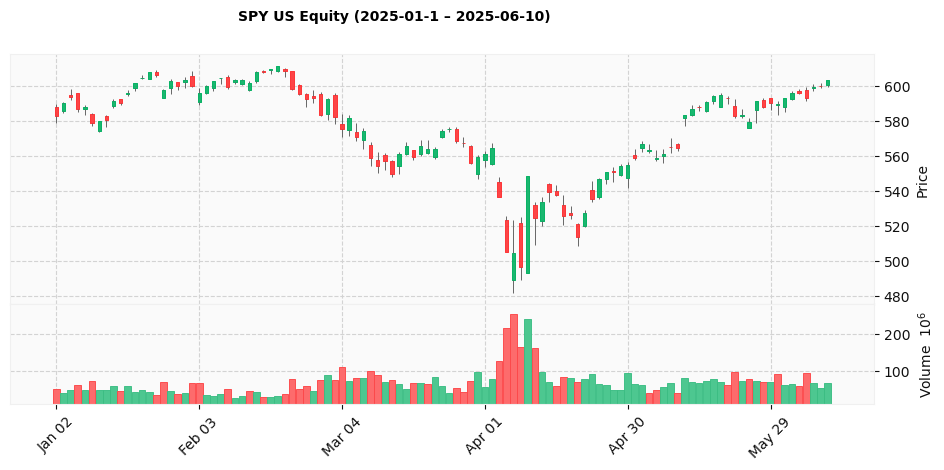

In [10]:

start_date='2025-01-1'
end_date='2025-06-10'

market_handle.plot('SPY US Equity', start_date, end_date, '1d', 'ohlc')

# Load a Universe

In [11]:
universe = ['SPY US Equity', 'QQQ US Equity']
start_date='2005-01-1'
end_date='2025-06-10'
frequency = '1d'
rebuild = False

market = market_handle.load_universe(universe, start_date, end_date, frequency, rebuild)

In [12]:
market['SPY US Equity']

,date,ticker,open,high,low,close,volume,insertion_time
0,2005-01-03,SPY US Equity,83.2045,83.3140,82.0413,82.3150,56002000.0,2025-06-11 11:02:00
1,2005-01-04,SPY US Equity,82.4244,82.4792,81.0423,81.3091,69270700.0,2025-06-11 11:02:00
2,2005-01-05,SPY US Equity,81.2475,81.5965,80.7412,80.7480,65878000.0,2025-06-11 11:02:00
3,2005-01-06,SPY US Equity,81.0423,81.5281,80.9191,81.1586,48291000.0,2025-06-11 11:02:00
4,2005-01-07,SPY US Equity,81.4049,81.5828,80.8301,81.0423,55857400.0,2025-06-11 11:02:00
...,...,...,...,...,...,...,...,...
5141,2025-06-10,SPY US Equity,600.2200,603.4700,599.0900,603.0800,66246973.0,2025-06-17 12:43:00
5142,2025-06-11,SPY US Equity,604.1900,605.0600,599.2700,601.3600,73658225.0,2025-06-17 12:43:00
5143,2025-06-12,SPY US Equity,600.0100,603.7500,599.5200,603.7500,64129003.0,2025-06-17 12:43:00
5144,2025-06-13,SPY US Equity,598.5000,601.8500,595.4800,597.0000,89505996.0,2025-06-17 12:43:00


# prepare market file

In [13]:

universe = ['SPY US Equity', 'QQQ US Equity']
start_date='2005-01-1'
end_date='2025-06-10'

market_handle.load_market(universe, start_date, end_date, rebuild=False)

In [14]:
market_handle.market_data

{'2005-01-03': {'EOD': {'ref_date': '2005-01-03',
   'equity': {'SPY US Equity': {'open': 83.2045,
     'high': 83.314,
     'low': 82.0413,
     'close': 82.315,
     'volume': 56002000.0,
     'is_valid': True},
    'QQQ US Equity': {'open': 34.3474,
     'high': 34.5377,
     'low': 33.7474,
     'close': 33.858,
     'volume': 101052208.0,
     'is_valid': True}},
   'rate': {'riskfree': None},
   'volatility': {}}},
 '2005-01-04': {'EOD': {'ref_date': '2005-01-04',
   'equity': {'SPY US Equity': {'open': 82.4244,
     'high': 82.4792,
     'low': 81.0423,
     'close': 81.3091,
     'volume': 69270700.0,
     'is_valid': True},
    'QQQ US Equity': {'open': 34.0217,
     'high': 34.0645,
     'low': 33.0445,
     'close': 33.2416,
     'volume': 136759292.0,
     'is_valid': True}},
   'rate': {'riskfree': None},
   'volatility': {}}},
 '2005-01-05': {'EOD': {'ref_date': '2005-01-05',
   'equity': {'SPY US Equity': {'open': 81.2475,
     'high': 81.5965,
     'low': 80.7412,
     